# Model Testing

In [28]:
from utils import load_model_history, plot_performance_curves, load_test_data, plot_test_metrics, save_test_metrics
from keras.utils import set_random_seed
from keras.utils import plot_model

# What's the meaning of life, the universe and everything!?
set_random_seed(42)

In [53]:
# Load model from the model name
model_name = "vgg16-regularized-adamax-noaug_model_cifake"
test_dir = './datasets/AI art/test/'
test_dataset_name = 'AI Art'

model_history_loaded, classifier, history = load_model_history(model_name)

## Model Architecture

In [54]:
# Get model architecture
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

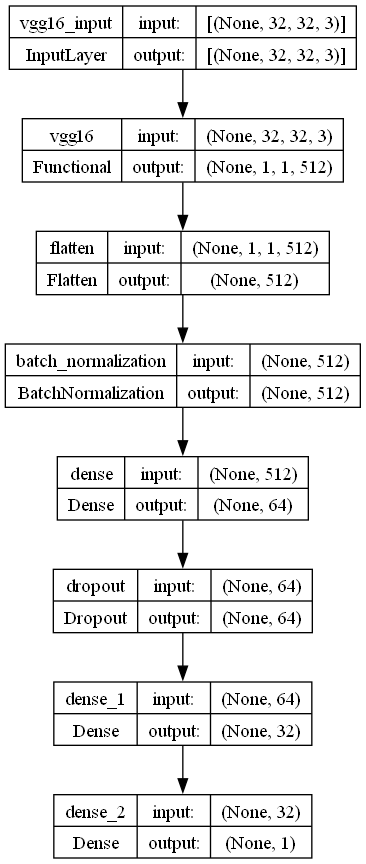

In [55]:
# Plot model architecture
plot_model(classifier, show_shapes = True, to_file = f'models/{model_name}/model.png')

## Performance curves

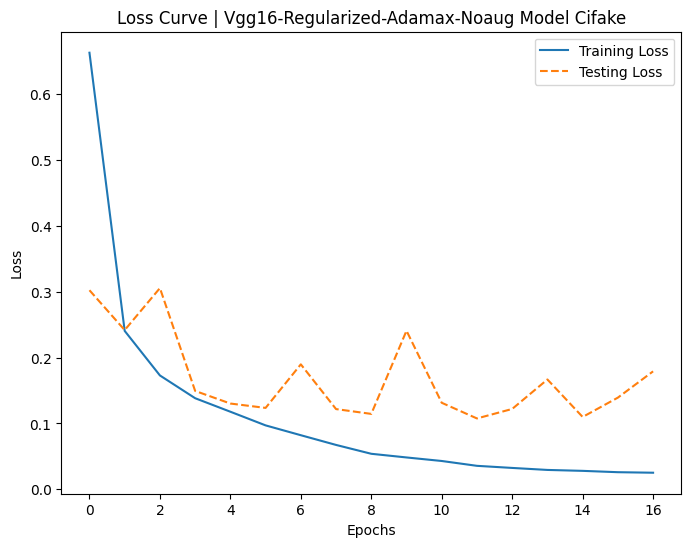

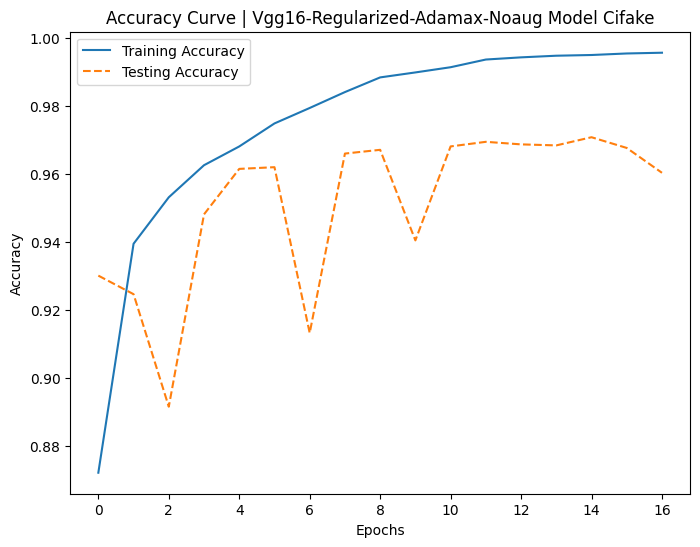

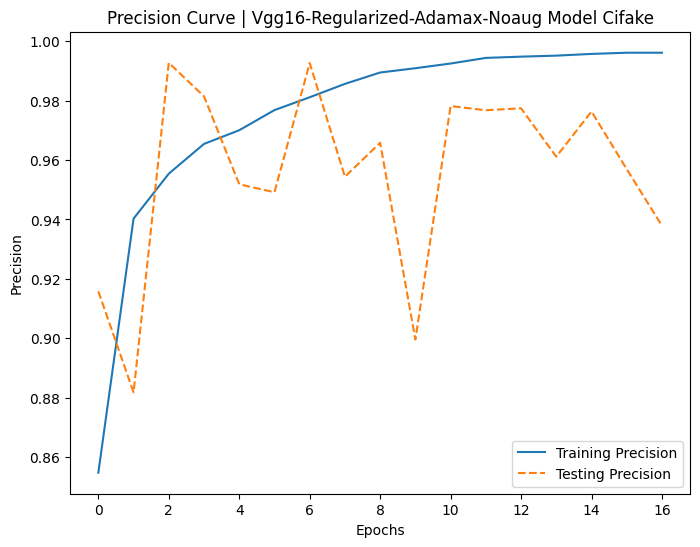

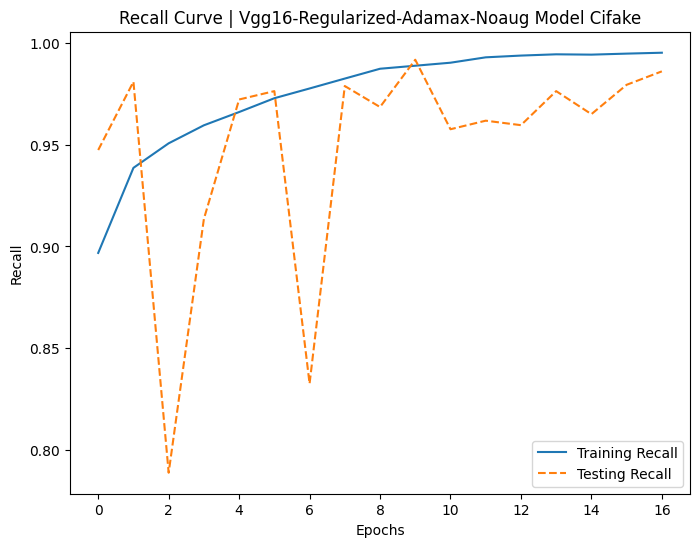

In [56]:
# Plot model performance curves
plot_performance_curves(history, model_name)

## Model Evaluation and Testing

In [57]:
# Load testing data from directory
test_generator = load_test_data(test_dir, augmented=True, data_config={}, batch_size=200)

Found 4328 images belonging to 2 classes.


In [58]:
# Evaluate model
loss, accuracy, precision, recall = classifier.evaluate(test_generator)
print(f'Testing loss: {loss}')
print(f'Testing accuracy: {accuracy}')
print(f'Testing precision: {precision}')
print(f'Testing recall: {recall}')

22/22 [==============================] - 69s 3s/step - loss: 1.1927 - accuracy: 0.7311 - precision: 0.2893 - recall: 0.3704
Testing loss: 1.1927365064620972
Testing accuracy: 0.7310535907745361
Testing precision: 0.28925618529319763
Testing recall: 0.37037035822868347


22/22 [==============================] - 50s 2s/step
ROC AUC Score: 0.5888805939197875
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      3572
           1       0.29      0.37      0.32       756

    accuracy                           0.73      4328
   macro avg       0.57      0.59      0.58      4328
weighted avg       0.76      0.73      0.74      4328



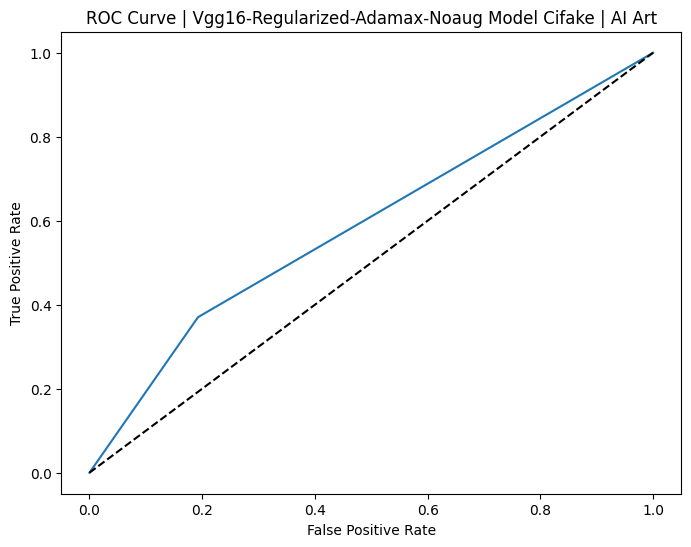

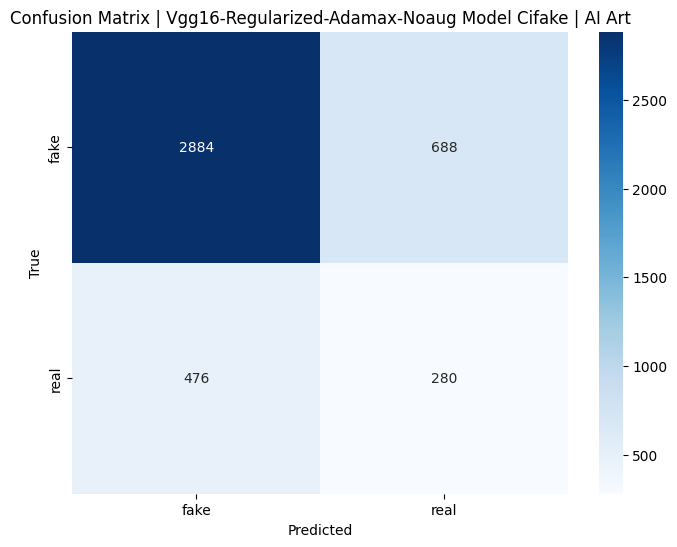

In [59]:
# Plot testing metrics
roc_auc_score, classification_report = plot_test_metrics(classifier, test_generator, model_name, test_dataset_name)

In [60]:
# Save test metrics
save_test_metrics(accuracy, loss, precision, recall, roc_auc_score, classification_report, test_dataset_name, model_name)